# Autoencoder Architecture

## Introduction
Autoencoder is a kind of Deep Learning architectures. Autoencoder architecture encompasses two sub-systems as encoder and decoder. Both these sub-systems are made up of independent Neural Network with a defined set of layers and activation functions. The fundamental characteristic feature of Autoencoder architecture is extracting the latent(hidden) data points from the given dataset. 


## Dataset-Credit card transactions

The dataset we're going to use in this kernel is `creditcard.csv` which basically a credit card transactions in the past. Using an encoder-decorder system we will find the hidden data points and apply a linear classifier to detect the Fraud(1) or Genuine/not-fraud (0) credit card transactions. 

## Import dependent libraries

In [31]:
import pandas as pd
import numpy as np
import os

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# SKLearn related libraries
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Keras NN related libraries
from keras import layers
from keras.layers import Input, Dense
from keras.models import Model, Sequential 
from keras import regularizers

## Loading Dataset

In [32]:
data_path = '/kaggle/input/creditcardfraud/creditcard.csv'

# print(os.path.exists(data_path))

# Load the data
card_df = pd.read_csv(data_path, header=0)

In [33]:
card_df.info()
print("===="*30)
card_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis

1. Exploring on statistics information about the data

In [34]:
card_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [35]:
# Unique class labels
print(f"Unique classes in the dataset are : {np.unique(card_df['Class'])}" )

Unique classes in the dataset are : [0 1]


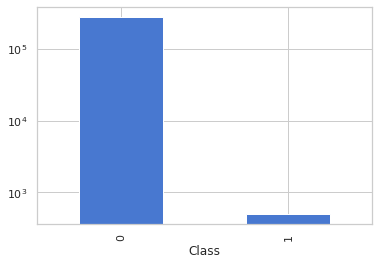

In [36]:
card_df.groupby('Class')['Class'].count().plot.bar(logy=True)

## Trasnformation

Data transformation is one of the steps in data processing. We need to transform certain attributes value so that it makes sense in the further analysis. 

In [37]:
# Change the time attribute in day
card_df['Time'] = card_df['Time'].apply(lambda t: (t/3600) % 24 )

In [38]:
card_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [39]:
# Sampling of data
normal_trans = card_df[card_df['Class'] == 0].sample(500)
fraud_trans = card_df[card_df['Class'] == 1]

In [40]:
reduced_set = normal_trans.append(fraud_trans).reset_index(drop=True)

In [41]:
print(f"Cleansed dataset shape : {reduced_set.shape}")

Cleansed dataset shape : (992, 31)


## Split the Dataset

In [42]:
# Splitting the dataset into X and y features
y = reduced_set['Class']
X = reduced_set.drop('Class', axis=1)


In [43]:
print(f"Shape of Features : {X.shape} and Target: {y.shape}")

Shape of Features : (992, 30) and Target: (992,)


## Visualize the data with t-SNE

TNSE(t-distributed Stochastic Neighbor Embedding) is one of the dimensionality reduction method other than PCA and SVD. This will supress some noise and speed up the computation of pairwise distance between samples. 

In [44]:
def dimensionality_plot(X, y):
    sns.set(style='whitegrid', palette='muted')
    # Initializing TSNE object with 2 principal components
    tsne = TSNE(n_components=2, random_state = 42)
    
    # Fitting the data
    X_trans = tsne.fit_transform(X)
    
    plt.figure(figsize=(12,8))
    
    plt.scatter(X_trans[np.where(y == 0), 0], X_trans[np.where(y==0), 1], marker='o', color='g', linewidth='1', alpha=0.8, label='Normal')
    plt.scatter(X_trans[np.where(y == 1), 0], X_trans[np.where(y==1), 1], marker='o', color='k', linewidth='1', alpha=0.8, label='Fraud')
    
    plt.legend(loc = 'best')
    
    plt.show()



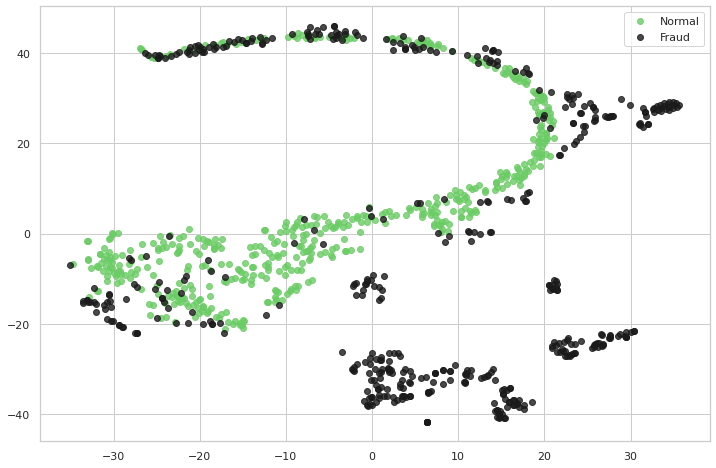

In [45]:
# Invoking the method dimensionality_plot
dimensionality_plot(X, y)

## Normalize and Scale the features

In [46]:
scaler = RobustScaler().fit_transform(X)

# Scaled data
X_scaled_normal = scaler[y == 0]
X_scaled_fraud = scaler[y == 1]

## Building Autoencoder Model

In [47]:
print(f"Shape of the input data : {X.shape[1]}")

Shape of the input data : 30


In [48]:
# Input layer with a shape of features/columns of the dataset
input_layer = Input(shape = (X.shape[1], ))

# Construct encoder network
encoded = Dense(100, activation= 'tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(encoded)
encoded = Dense(25, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(encoded)
encoded = Dense(12, activation = 'tanh', activity_regularizer=regularizers.l1(10e-5))(encoded)
encoded = Dense(6, activation='relu')(encoded)

# Decoder network
decoded = Dense(12, activation='tanh')(encoded)
decoded = Dense(25, activation='tanh')(decoded)
decoded = Dense(50, activation='tanh')(decoded)
decoded = Dense(100, activation='tanh')(decoded)

output_layer = Dense(X.shape[1], activation='relu')(decoded)

# Building a model
auto_encoder = Model(input_layer, output_layer)

In [49]:
# Compile the auto encoder model
auto_encoder.compile(optimizer='adadelta', loss='mse')

# Training the auto encoder model
auto_encoder.fit(X_scaled_normal, X_scaled_normal, batch_size=32, epochs=20, shuffle=True, validation_split=0.20)

Train on 400 samples, validate on 100 samples
Epoch 1/20
400/400 [==============================] - 0s 808us/step - loss: 1.0867 - val_loss: 0.4406
Epoch 2/20
400/400 [==============================] - 0s 72us/step - loss: 0.9902 - val_loss: 0.4077
Epoch 3/20
400/400 [==============================] - 0s 92us/step - loss: 0.9215 - val_loss: 0.4033
Epoch 4/20
400/400 [==============================] - 0s 90us/step - loss: 0.8759 - val_loss: 0.3905
Epoch 5/20
400/400 [==============================] - 0s 102us/step - loss: 0.8414 - val_loss: 0.3816
Epoch 6/20
400/400 [==============================] - 0s 96us/step - loss: 0.8166 - val_loss: 0.3815
Epoch 7/20
400/400 [==============================] - 0s 80us/step - loss: 0.7884 - val_loss: 0.3702
Epoch 8/20
400/400 [==============================] - 0s 80us/step - loss: 0.7693 - val_loss: 0.3698
Epoch 9/20
400/400 [==============================] - 0s 84us/step - loss: 0.7759 - val_loss: 0.3677
Epoch 10/20
400/400 [======================

## Using Autoencode to encode data

In [50]:
latent_model = Sequential()
latent_model.add(auto_encoder.layers[0])
latent_model.add(auto_encoder.layers[1])
latent_model.add(auto_encoder.layers[2])
latent_model.add(auto_encoder.layers[3])
latent_model.add(auto_encoder.layers[4])

In [51]:
normal_tran_points = latent_model.predict(X_scaled_normal)
fraud_tran_points = latent_model.predict(X_scaled_fraud)
# Making as a one collection
encoded_X = np.append(normal_tran_points, fraud_tran_points, axis=0)
y_normal = np.zeros(normal_tran_points.shape[0])
y_fraud = np.ones(fraud_tran_points.shape[0])
encoded_y = np.append(y_normal, y_fraud, axis=0)


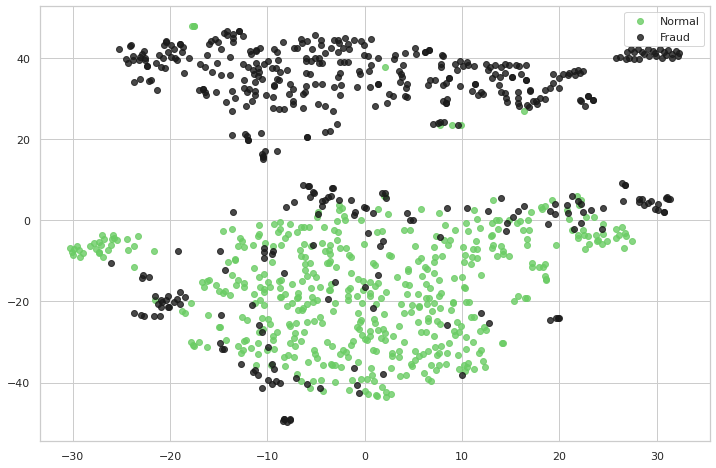

In [52]:
# Calling TSNE plot function
dimensionality_plot(encoded_X, encoded_y)

We can observe that the encoded fraud data points have been moved towards one cluster, whereas there are only few fraud transaction datapoints are there among the normal transaction data points. 

## Split into Train and Test

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_enc_train, X_enc_test, y_enc_train, y_enc_test = train_test_split(encoded_X, encoded_y, test_size=0.3)

In [54]:
print(f"Encoded train data X: {X_enc_train.shape}, Y: {y_enc_train.shape}, X_test :{X_enc_test.shape}, Y_test: {y_enc_test.shape}")
print(f"Actual train & test data X: {X_train.shape}, Y: {X_train.shape}, X_test :{X_test.shape}, Y_test: {y_test.shape}")

Encoded train data X: (694, 12), Y: (694,), X_test :(298, 12), Y_test: (298,)
Actual train & test data X: (694, 30), Y: (694, 30), X_test :(298, 30), Y_test: (298,)


## Non-linear Classifier

In [55]:
# Instance of SVM
svc_clf = SVC()

svc_clf.fit(X_train, y_train)

svc_predictions = svc_clf.predict(X_test)

In [56]:
print("Classification report \n {0}".format(classification_report(y_test, svc_predictions)))

Classification report 
               precision    recall  f1-score   support

           0       0.75      0.94      0.83       155
           1       0.90      0.66      0.76       143

    accuracy                           0.80       298
   macro avg       0.83      0.80      0.80       298
weighted avg       0.82      0.80      0.80       298



In [57]:
print("Accuracy of SVC \n {:.2f}".format(accuracy_score(y_test, svc_predictions)))

Accuracy of SVC 
 0.80


## Linear Classifier

Now let's apply linear classifier to classify the data and observe the result. We will use **Logistic Regression** to build the model.

In [58]:
lr_clf = LogisticRegression()

lr_clf.fit(X_enc_train, y_enc_train)

# Predict the Test data
predictions = lr_clf.predict(X_enc_test)

In [59]:
print("Classification report \n {0}".format(classification_report(y_enc_test, predictions)))


Classification report 
               precision    recall  f1-score   support

         0.0       0.85      0.94      0.90       159
         1.0       0.93      0.81      0.87       139

    accuracy                           0.88       298
   macro avg       0.89      0.88      0.88       298
weighted avg       0.89      0.88      0.88       298



In [60]:
print("Accuracy score is : {:.2f}".format(accuracy_score(y_enc_test, predictions)))

Accuracy score is : 0.88


## Conclusion

In this analysis, we have found that Support Vector Machine classifier is able to classify the data upto **80%** without encoding and decoding. However, the effect of autoencoder comes when the data gets transformed from non-linear to linearly separable then linear classifier like **Logistic Regression** could perform in a better way.

The accuracy score of Logistic Regression can go upto **88%**, this is something not happens too often in logistic algorithm. 